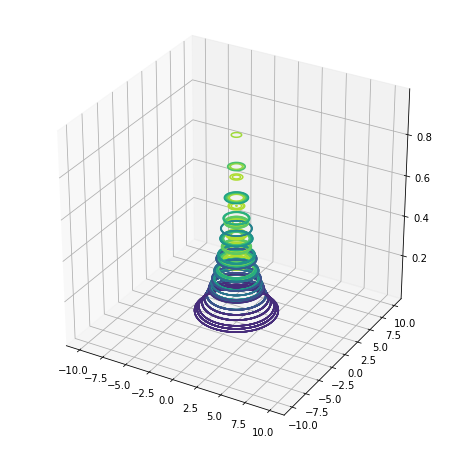

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *
from cmath import *

# We want to solve:
# i u_t = (1/2)(u_xx+u_yy)+g(|u|^2)u +Vu, u(x,y,0)=u_0(x,y) given (and for different BCs)
# This is the nonlinear schrodinger equation.
# V=V(x,y)
# Let RHS be F(u), wjere F is an operator on u.

# Approximations: for small dx,dy,dt
# u_t(x,y,t)~(u(x,y,t+dt)-u(x,y,t))/dt
# u_x ~ (u(x+dx,y,t)-u(x-dx,y,t))/2dx <- better approx than above (same for dy)
# So u_xx ~ (u(x+dx,y,t)-2u(x,y,t)+u(x-dx,y,t))/dx (same for dy).

# We can get an explicit euler method: u_{nm}^{k+1} = u_{nm}^{k}+dt*F(u_{nm}^{k})
# We can have better methods but for now let's get it working.

def sech(var):
    return 1/np.cosh(var)

# Discretization:
g=-1 # bright soliton solution when g=-1, dark when g=1
V=0 # No potenital for now
dt=0.1
dx=0.1
dy=0.1
Lx=-10 
Rx=10
Ly=-10 
Ry=10

Nx=int((Rx-Lx)/dx)
Ny=int((Ry-Ly)/dy) # need to be integers
x,y=np.meshgrid(np.linspace(Lx,Rx,num=Nx),np.linspace(Ly,Ry,num=Ny))
r=[0,0] # initial position
c=[0,0] # initial velocity
w=0.5
A=sqrt(2*w) #initial amplitude

u0=A*sech(A*np.sqrt((x-r[0])**2+(y-r[1])**2))*np.exp(w*(c[0]*x+c[1]*y)*1j) # initial sech solution (bright soliton)

def F(u,V):
    return g*u.conjugate()*u**2 + V*u

def EE_2D(u0,t_step,V):
    return u0+t_step*F(u0,V)

T=5 # final time
t0=0 # initial time
t=t0
u=u0

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
while t<=T:
    surf=plt.contour(x,y,u)
    u=EE_2D(u,dt,V)
    t+=dt